In [41]:
!gdown --id 19YGQcsH5IHCf2AOMn5v6gwsb9cmo1IRf

Downloading...
From: https://drive.google.com/uc?id=19YGQcsH5IHCf2AOMn5v6gwsb9cmo1IRf
To: /content/Dataset_IMDB.csv
22.1MB [00:00, 135MB/s]


In [42]:
import pandas as pd

In [43]:
df = pd.read_csv("Dataset_IMDB.csv")
df.head()

,Id,Text,Author,Rating
0,29420,"In my opinion, a movie reviewer's most importa...",Schwartz,0.1
1,17219,STARSHIP TROOPERS (director: Paul Verhoeven; c...,Schwartz,0.2
2,18406,"THE SCHOOL OF FLESH (ECOLE DE lA CHAIR, L') (D...",Schwartz,0.2
3,18648,"LOCK, STOCK AND TWO SMOKING BARRELS (director:...",Schwartz,0.2
4,20021,RUN LOLA RUN (LOLA RENNT)(director/writer: Tom...,Schwartz,0.2


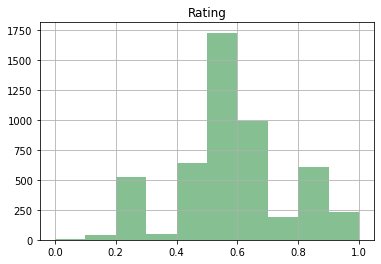

In [44]:
ax = df.hist(column='Rating', color='#86bf91')

In [45]:
def to_sentiment(rating):
  rating = float(rating)
  if rating <0.5:
    return 0
  elif 0.5 <= rating <= 0.6:
    return 1
  else: 
    return 2
df['sentiment'] = df.Rating.apply(to_sentiment)

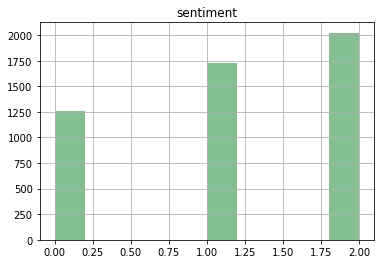

In [46]:

ax = df.hist(column='sentiment', color='#86bf91')

In [47]:
import os
import numpy as np

import tensorflow as tf
import tensorflow_hub as hub
import tensorflow_datasets as tfds
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder

In [48]:
RANDOM_SEED = 42

# type_one_hot = OneHotEncoder(sparse=False).fit_transform(df.sentiment.to_numpy().reshape(-1,1))

# train_reviews, test_reviews, y_train, y_test =\
#   train_test_split(
#     df.Text,
#     type_one_hot,
#     test_size=.2,
#     random_state=RANDOM_SEED
#   )
train_reviews, test_reviews, y_train, y_test =\
  train_test_split(
    df.Text,
    df.sentiment,
    test_size=.2,
    random_state=RANDOM_SEED
  )

In [49]:
use = hub.load("https://tfhub.dev/google/universal-sentence-encoder-large/5")

In [50]:
embedding = "https://tfhub.dev/google/nnlm-en-dim50/2"
hub_layer = hub.KerasLayer(embedding, input_shape=[], 
                           dtype=tf.string, trainable=True)

In [51]:
example = tf.constant([train_reviews[0]])

In [52]:
hub_layer(example)

<tf.Tensor: shape=(1, 50), dtype=float32, numpy=
array([[ 1.2697432 ,  0.09498837, -0.0648245 ,  0.8759313 , -0.12257382,
         0.2412162 ,  0.30531728, -0.42883378, -0.8675021 ,  0.2697764 ,
         0.43451667,  0.00286632, -0.15072194,  0.62444043, -0.5639269 ,
        -0.6115935 , -0.09648587,  0.46855038,  0.34482878, -1.2664597 ,
         0.3528935 , -0.41800177,  1.2538342 ,  0.2933848 , -0.34422404,
         0.22047777, -1.8537087 ,  0.36663243,  0.7196413 , -0.5561487 ,
        -0.847555  ,  0.55082124,  0.36414868, -0.34950393, -0.5862388 ,
         0.3178733 ,  0.60844415, -0.01862843,  0.0030486 , -0.7608907 ,
         0.09473806,  0.32071403, -0.7463436 ,  0.49444523, -0.68117994,
        -0.3422166 , -0.5593501 , -0.6481171 ,  0.6146184 ,  0.18219064]],
      dtype=float32)>

In [53]:
model = tf.keras.Sequential()
model.add(hub_layer)
model.add(tf.keras.layers.Dense(25, activation='relu'))
model.add(tf.keras.layers.Dense(16, activation='relu'))
model.add(tf.keras.layers.Dense(3, activation = 'softmax'))

model.summary()

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
keras_layer_1 (KerasLayer)   (None, 50)                48190600  
_________________________________________________________________
dense_9 (Dense)              (None, 25)                1275      
_________________________________________________________________
dense_10 (Dense)             (None, 16)                416       
_________________________________________________________________
dense_11 (Dense)             (None, 3)                 51        
Total params: 48,192,342
Trainable params: 48,192,342
Non-trainable params: 0
_________________________________________________________________


In [54]:
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(),
              metrics=['accuracy'])

In [55]:
train_dataset = tf.data.Dataset.from_tensor_slices((train_reviews, y_train))
test_dataset = tf.data.Dataset.from_tensor_slices((test_reviews, y_test))

In [56]:
train_dataset = train_dataset.shuffle(len(train_reviews)).batch(1)
test_dataset = test_dataset.shuffle(len(test_reviews)).batch(1)

In [57]:
callback = tf.keras.callbacks.EarlyStopping(monitor='loss', patience=3)
model.fit(train_dataset, epochs=5, callbacks=[callback])

Epoch 1/5
4004/4004 [==============================] - 121s 30ms/step - loss: 0.9660 - accuracy: 0.4970
Epoch 2/5
4004/4004 [==============================] - 121s 30ms/step - loss: 0.2982 - accuracy: 0.8934
Epoch 3/5
4004/4004 [==============================] - 121s 30ms/step - loss: 0.0533 - accuracy: 0.9848
Epoch 4/5
4004/4004 [==============================] - 121s 30ms/step - loss: 0.0100 - accuracy: 0.9984
Epoch 5/5
4004/4004 [==============================] - 123s 31ms/step - loss: 0.0014 - accuracy: 0.9997


In [58]:
score = model.evaluate(test_dataset)

1002/1002 [==============================] - 4s 4ms/step - loss: 1.8800 - accuracy: 0.6587


In [59]:
score

[1.8799980878829956, 0.658682644367218]

# Dataset 2
https://www.kaggle.com/clmentbisaillon/fake-and-real-news-dataset?select=Fake.csv

In [60]:
!gdown --id 1An_uo6EU7pFPeedUCOkQNcYTXsM2Bl9n


Downloading...
From: https://drive.google.com/uc?id=1An_uo6EU7pFPeedUCOkQNcYTXsM2Bl9n
To: /content/financial-news-all-data.csv
100% 672k/672k [00:00<00:00, 96.9MB/s]


In [61]:
df = pd.read_csv("financial-news-all-data.csv", encoding = "cp1252")
df.columns = ['sentiment', 'content']

In [62]:
class_names = ['negative', 'neutral', 'positive']

def to_label(sentiment):
  return class_names.index(sentiment)

df['label'] = df.sentiment.apply(to_label)
df['content'] = df.content.apply(lambda x: x.lower ())
df.head()


,sentiment,content,label
0,neutral,technopolis plans to develop in stages an area...,1
1,negative,the international electronic industry company ...,0
2,positive,with the new production plant the company woul...,2
3,positive,according to the company 's updated strategy f...,2
4,positive,financing of aspocomp 's growth aspocomp is ag...,2


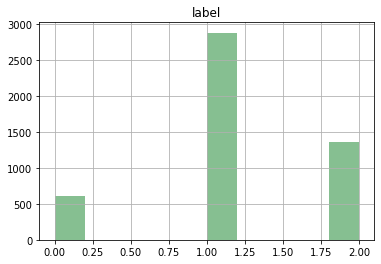

In [63]:
ax = df.hist(column='label', color='#86bf91')

In [64]:
negative_rv = df[df.sentiment=='negative']
negative_rv = negative_rv.reset_index(drop=True)
negative_rv.head()

,sentiment,content,label
0,negative,the international electronic industry company ...,0
1,negative,a tinyurl link takes users to a scamming site ...,0
2,negative,"compared with the ftse 100 index , which rose ...",0
3,negative,"compared with the ftse 100 index , which rose ...",0
4,negative,one of the challenges in the oil production in...,0


In [65]:
neutral_rv = df[df.sentiment=='neutral']
print(len(neutral_rv))
neutral_rv = neutral_rv.sample(n=len(negative_rv), random_state=RANDOM_SEED)
neutral_rv = neutral_rv.reset_index(drop=True)
neutral_rv.head()

2878


,sentiment,content,label
0,neutral,the commission said the hydrogen peroxide and ...,1
1,neutral,after 1 april 2007 cencorp will not have any o...,1
2,neutral,the bank 's leasing arm nordea liising ended t...,1
3,neutral,her work at netapp included strategically repo...,1
4,neutral,ahlstrom 's share is quoted on the nasdaq omx ...,1


In [66]:
reviews = df[df.sentiment=='positive'].append(negative_rv)
reviews = reviews.append(neutral_rv).reset_index(drop=True)
print(len(reviews), len(neutral_rv), len(negative_rv))
reviews.head()

2571 604 604


,sentiment,content,label
0,positive,with the new production plant the company woul...,2
1,positive,according to the company 's updated strategy f...,2
2,positive,financing of aspocomp 's growth aspocomp is ag...,2
3,positive,"for the last quarter of 2010 , componenta 's n...",2
4,positive,"in the third quarter of 2010 , net sales incre...",2


In [67]:
train_reviews, test_reviews, y_train, y_test =\
  train_test_split(
    reviews.content,
    reviews.label,
    test_size=.1,
    random_state=RANDOM_SEED
  )

In [68]:
model = tf.keras.Sequential()
model.add(hub_layer)
model.add(tf.keras.layers.Dense(10, activation='relu'))
model.add(tf.keras.layers.Dense(8, activation='relu'))
model.add(tf.keras.layers.Dense(3, activation = 'softmax'))

model.summary()
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(),
              metrics=['accuracy'])

Model: "sequential_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
keras_layer_1 (KerasLayer)   (None, 50)                48190600  
_________________________________________________________________
dense_12 (Dense)             (None, 10)                510       
_________________________________________________________________
dense_13 (Dense)             (None, 8)                 88        
_________________________________________________________________
dense_14 (Dense)             (None, 3)                 27        
Total params: 48,191,225
Trainable params: 48,191,225
Non-trainable params: 0
_________________________________________________________________


In [69]:
train_dataset = tf.data.Dataset.from_tensor_slices((train_reviews, y_train))
test_dataset = tf.data.Dataset.from_tensor_slices((test_reviews, y_test))

In [70]:
train_dataset = train_dataset.shuffle(len(train_reviews)).batch(1)
test_dataset = test_dataset.shuffle(len(test_reviews)).batch(1)

In [71]:
callback = tf.keras.callbacks.EarlyStopping(monitor='loss', patience=2)
model.fit(train_dataset, epochs=5, callbacks=[callback])

Epoch 1/5
2313/2313 [==============================] - 72s 31ms/step - loss: 0.9655 - accuracy: 0.5005
Epoch 2/5
2313/2313 [==============================] - 71s 31ms/step - loss: 0.4390 - accuracy: 0.8076
Epoch 3/5
2313/2313 [==============================] - 71s 31ms/step - loss: 0.1496 - accuracy: 0.9596
Epoch 4/5
2313/2313 [==============================] - 71s 31ms/step - loss: 0.0504 - accuracy: 0.9852
Epoch 5/5
2313/2313 [==============================] - 71s 31ms/step - loss: 0.0169 - accuracy: 0.9962


In [72]:
model.evaluate(test_dataset)

258/258 [==============================] - 1s 3ms/step - loss: 1.1768 - accuracy: 0.7054


[1.1768087148666382, 0.7054263353347778]

# Dataset 3
https://www.kaggle.com/c/word2vec-nlp-tutorial/data

In [73]:
!gdown --id 1abFkFGOl-1Ch-fEzYwBcs12b-Vk_5w-k

Downloading...
From: https://drive.google.com/uc?id=1abFkFGOl-1Ch-fEzYwBcs12b-Vk_5w-k
To: /content/labeledTrainData.tsv
33.6MB [00:00, 157MB/s]


In [74]:
df = pd.read_csv("labeledTrainData.tsv", sep='\t')
df.head()

,id,sentiment,review
0,5814_8,1,With all this stuff going down at the moment w...
1,2381_9,1,"\The Classic War of the Worlds\"" by Timothy Hi..."
2,7759_3,0,The film starts with a manager (Nicholas Bell)...
3,3630_4,0,It must be assumed that those who praised this...
4,9495_8,1,Superbly trashy and wondrously unpretentious 8...


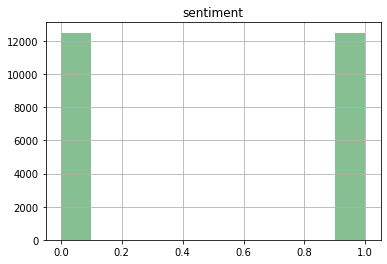

In [75]:
ax = df.hist(column='sentiment', color='#86bf91')

In [76]:
RANDOM_SEED = 42

train_reviews, test_reviews, y_train, y_test =\
  train_test_split(
    df.review,
    df.sentiment,
    test_size=.2,
    random_state=RANDOM_SEED
  )

In [77]:
model = tf.keras.Sequential()
model.add(hub_layer)
model.add(tf.keras.layers.Dense(25, activation='relu'))
model.add(tf.keras.layers.Dense(10, activation='relu'))
model.add(tf.keras.layers.Dense(3, activation = 'softmax'))

model.summary()
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(),
              metrics=['accuracy'])

Model: "sequential_5"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
keras_layer_1 (KerasLayer)   (None, 50)                48190600  
_________________________________________________________________
dense_15 (Dense)             (None, 25)                1275      
_________________________________________________________________
dense_16 (Dense)             (None, 10)                260       
_________________________________________________________________
dense_17 (Dense)             (None, 3)                 33        
Total params: 48,192,168
Trainable params: 48,192,168
Non-trainable params: 0
_________________________________________________________________


In [78]:
train_dataset = tf.data.Dataset.from_tensor_slices((train_reviews, y_train))
test_dataset = tf.data.Dataset.from_tensor_slices((test_reviews, y_test))

In [79]:
train_dataset = train_dataset.shuffle(len(train_reviews)).batch(1)
test_dataset = test_dataset.shuffle(len(test_reviews)).batch(1)

In [80]:
callback = tf.keras.callbacks.EarlyStopping(monitor='loss', patience=2)
model.fit(train_dataset, epochs=5, callbacks=[callback])

Epoch 1/5
20000/20000 [==============================] - 620s 31ms/step - loss: 0.3997 - accuracy: 0.8294
Epoch 2/5
20000/20000 [==============================] - 592s 30ms/step - loss: 0.1567 - accuracy: 0.9418
Epoch 3/5
20000/20000 [==============================] - 571s 29ms/step - loss: 0.0759 - accuracy: 0.9730
Epoch 4/5
20000/20000 [==============================] - 571s 29ms/step - loss: 0.0296 - accuracy: 0.9905
Epoch 5/5
20000/20000 [==============================] - 572s 29ms/step - loss: 0.0116 - accuracy: 0.9967


In [81]:
model.evaluate(test_dataset)

5000/5000 [==============================] - 11s 2ms/step - loss: 0.8328 - accuracy: 0.8660


[0.8328311443328857, 0.8659999966621399]

#Dataset 4
https://www.kaggle.com/crowdflower/twitter-airline-sentiment


In [82]:
!gdown --id 1-Qdu-WAuSGAhl5U27xpFRAu7r5EfG5Bh

Downloading...
From: https://drive.google.com/uc?id=1-Qdu-WAuSGAhl5U27xpFRAu7r5EfG5Bh
To: /content/Tweets.csv
3.42MB [00:00, 109MB/s]


In [83]:
import pandas as pd

In [84]:
df = pd.read_csv("Tweets.csv")
df.head()

,tweet_id,airline_sentiment,airline_sentiment_confidence,negativereason,negativereason_confidence,airline,airline_sentiment_gold,name,negativereason_gold,retweet_count,text,tweet_coord,tweet_created,tweet_location,user_timezone
0,570306133677760513,neutral,1.0000,NaN,NaN,Virgin America,NaN,cairdin,NaN,0,@VirginAmerica What @dhepburn said.,NaN,2015-02-24 11:35:52 -0800,NaN,Eastern Time (US & Canada)
1,570301130888122368,positive,0.3486,NaN,0.0000,Virgin America,NaN,jnardino,NaN,0,@VirginAmerica plus you've added commercials t...,NaN,2015-02-24 11:15:59 -0800,NaN,Pacific Time (US & Canada)
2,570301083672813571,neutral,0.6837,NaN,NaN,Virgin America,NaN,yvonnalynn,NaN,0,@VirginAmerica I didn't today... Must mean I n...,NaN,2015-02-24 11:15:48 -0800,Lets Play,Central Time (US & Canada)
3,570301031407624196,negative,1.0000,Bad Flight,0.7033,Virgin America,NaN,jnardino,NaN,0,@VirginAmerica it's really aggressive to blast...,NaN,2015-02-24 11:15:36 -0800,NaN,Pacific Time (US & Canada)
4,570300817074462722,negative,1.0000,Can't Tell,1.0000,Virgin America,NaN,jnardino,NaN,0,@VirginAmerica and it's a really big bad thing...,NaN,2015-02-24 11:14:45 -0800,NaN,Pacific Time (US & Canada)


In [85]:
df[["airline_sentiment", "text"]].head(100)

,airline_sentiment,text
0,neutral,@VirginAmerica What @dhepburn said.
1,positive,@VirginAmerica plus you've added commercials t...
2,neutral,@VirginAmerica I didn't today... Must mean I n...
3,negative,@VirginAmerica it's really aggressive to blast...
4,negative,@VirginAmerica and it's a really big bad thing...
...,...,...
95,negative,"@VirginAmerica Is it me, or is your website do..."
96,negative,@VirginAmerica I can't check in or add a bag. ...
97,negative,@VirginAmerica - Let 2 scanned in passengers l...
98,negative,@virginamerica What is your phone number. I ca...


In [86]:
def to_sentiment(text_sentiment):
  if text_sentiment == 'negative':
    return 0
  elif text_sentiment == 'neutral':
    return 1
  else: 
    return 2
df['sentiment'] = df.airline_sentiment.apply(to_sentiment)

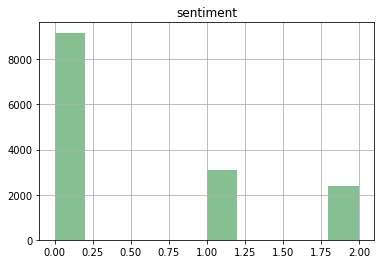

In [87]:
ax = df.hist(column='sentiment', color='#86bf91')

In [88]:
import re
def preprocess(sample):
  return re.sub(r"@\S+", "", sample)

preprocess("I am @mtnana and how")




'I am  and how'

In [89]:
df['content'] = df.text.apply(preprocess)

In [90]:
negative_rv = df[df.sentiment==0]
negative_rv = negative_rv.reset_index(drop=True)
neutral_rv = df[df.sentiment==1]
negative_rv = negative_rv.sample(n=len(neutral_rv), random_state=42)
neutral_rv = neutral_rv.reset_index(drop=True)
reviews = df[df.sentiment==2].append(negative_rv)
reviews = reviews.append(neutral_rv).reset_index(drop=True)
# reviews = reviews.rename(columns={'content': 'Content'})
reviews.head()

,tweet_id,airline_sentiment,airline_sentiment_confidence,negativereason,negativereason_confidence,airline,airline_sentiment_gold,name,negativereason_gold,retweet_count,text,tweet_coord,tweet_created,tweet_location,user_timezone,sentiment,content
0,570301130888122368,positive,0.3486,NaN,0.0,Virgin America,NaN,jnardino,NaN,0,@VirginAmerica plus you've added commercials t...,NaN,2015-02-24 11:15:59 -0800,NaN,Pacific Time (US & Canada),2,plus you've added commercials to the experien...
1,570300616901320704,positive,0.6745,NaN,0.0,Virgin America,NaN,cjmcginnis,NaN,0,"@VirginAmerica yes, nearly every time I fly VX...",NaN,2015-02-24 11:13:57 -0800,San Francisco CA,Pacific Time (US & Canada),2,"yes, nearly every time I fly VX this “ear wor..."
2,570299953286942721,positive,0.6559,NaN,NaN,Virgin America,NaN,dhepburn,NaN,0,"@virginamerica Well, I didn't…but NOW I DO! :-D",NaN,2015-02-24 11:11:19 -0800,San Diego,Pacific Time (US & Canada),2,"Well, I didn't…but NOW I DO! :-D"
3,570295459631263746,positive,1.0000,NaN,NaN,Virgin America,NaN,YupitsTate,NaN,0,"@VirginAmerica it was amazing, and arrived an ...",NaN,2015-02-24 10:53:27 -0800,Los Angeles,Eastern Time (US & Canada),2,"it was amazing, and arrived an hour early. Yo..."
4,570289724453216256,positive,1.0000,NaN,NaN,Virgin America,NaN,HyperCamiLax,NaN,0,@VirginAmerica I &lt;3 pretty graphics. so muc...,NaN,2015-02-24 10:30:40 -0800,NYC,America/New_York,2,I &lt;3 pretty graphics. so much better than ...


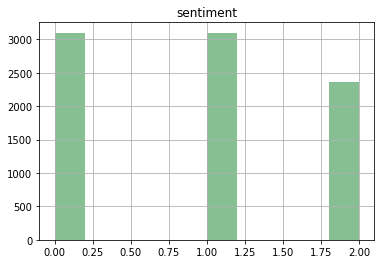

In [91]:
ax = reviews.hist(column='sentiment', color='#86bf91')

In [92]:
import os
import numpy as np

import tensorflow as tf
import tensorflow_hub as hub
import tensorflow_datasets as tfds
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder

In [93]:
train_reviews, test_reviews, y_train, y_test =\
  train_test_split(
    reviews.content,
    reviews.sentiment,
    test_size=.2,
    random_state=RANDOM_SEED
  )

In [94]:
model = tf.keras.Sequential()
model.add(hub_layer)
model.add(tf.keras.layers.Dense(10, activation='relu'))
model.add(tf.keras.layers.Dense(8, activation='relu'))
model.add(tf.keras.layers.Dense(3, activation = 'softmax'))

model.summary()
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(),
              metrics=['accuracy'])

Model: "sequential_6"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
keras_layer_1 (KerasLayer)   (None, 50)                48190600  
_________________________________________________________________
dense_18 (Dense)             (None, 10)                510       
_________________________________________________________________
dense_19 (Dense)             (None, 8)                 88        
_________________________________________________________________
dense_20 (Dense)             (None, 3)                 27        
Total params: 48,191,225
Trainable params: 48,191,225
Non-trainable params: 0
_________________________________________________________________


In [95]:
train_dataset = tf.data.Dataset.from_tensor_slices((train_reviews, y_train))
test_dataset = tf.data.Dataset.from_tensor_slices((test_reviews, y_test))
train_dataset = train_dataset.shuffle(len(train_reviews)).batch(1)
test_dataset = test_dataset.shuffle(len(test_reviews)).batch(1)

In [96]:
callback = tf.keras.callbacks.EarlyStopping(monitor='loss', patience=3)
model.fit(train_dataset, epochs=5, callbacks=[callback])

Epoch 1/5
6848/6848 [==============================] - 197s 29ms/step - loss: 0.9178 - accuracy: 0.5225
Epoch 2/5
6848/6848 [==============================] - 199s 29ms/step - loss: 0.4281 - accuracy: 0.8395
Epoch 3/5
6848/6848 [==============================] - 199s 29ms/step - loss: 0.2550 - accuracy: 0.9088
Epoch 4/5
6848/6848 [==============================] - 198s 29ms/step - loss: 0.1473 - accuracy: 0.9483
Epoch 5/5
6848/6848 [==============================] - 196s 29ms/step - loss: 0.0880 - accuracy: 0.9699


In [97]:
model.evaluate(test_dataset)

1713/1713 [==============================] - 4s 2ms/step - loss: 1.3153 - accuracy: 0.6871


[1.3152927160263062, 0.6870986819267273]